In [29]:
import json, jsonlines
import itertools
import glob
from collections import defaultdict, Counter
from tqdm import tqdm
from datetime import datetime,timedelta

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [14]:
DATA = "bitswap_summary.json"

In [15]:
# This is a large file so we'll process it line by line
bitswap = []

for line in jsonlines.open(DATA):    
    # Remove Mongo ID
    del line['_id']
    
    # Create the location code
    vantage = line['VANTAGE']
    line['VANTAGE'] = vantage.split(".")[0].split("-")[-1] if vantage != "fruchter-ipfs-probe" else "chs1"    
    # Unix timestamp conversion
    line['TIMESTAMP'] = datetime.fromtimestamp(line['TIMESTAMP'])
    
    bitswap.append(line)
    
df = pd.DataFrame(bitswap)

[[<matplotlib.axis.XTick at 0x13b0dc978>,

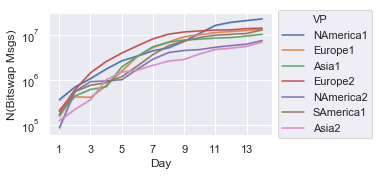

In [73]:
# Create day counter for graphing using offset
df['Day'] = (df.TIMESTAMP - timedelta(days=22)).dt.day
df['VP_SHORT'] = df.VANTAGE.str[0:3]

# Map location code to region code
df['VP'] = df.VP_SHORT.map({'ams': "Europe1", 'bom': "Asia1", 'chs': 'NAmerica1', 'gru': "SAmerica1", 'hel': "Europe2", "lax": "NAmerica2", "sin": "Asia2"})
df['N(Bitswap Msgs)'] = df['MessagesReceived']+1

# Plot
sns.set(rc={'figure.figsize':(4,2.25)})

# Cumulative messages for 2 weeks of observation
g = sns.lineplot(data=df[ df.Day < 15], hue='VP', x='Day', y='N(Bitswap Msgs)', estimator='mean')

# Set up axes and move legend off to the side
g.set(yticks=np.logspace(np.log10(0.1),np.log10(1e8), 10), yscale='symlog')
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g.set(xticks=np.arange(1,15,2))


[Text(0,0.5,'N(Peers Connected)'),

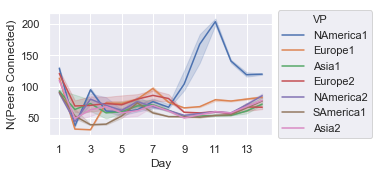

In [74]:
# Plot median number of peers connected to each VP over time
g = sns.lineplot(data=df[ df.Day < 15], hue='VP', x='Day', y='NPeers', estimator=np.median)
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
g.set(ylabel="N(Peers Connected)", xticks=np.arange(1,15,2))

In [75]:
df

,BlocksReceived,BlocksSent,DataReceived,DataSent,MessagesReceived,NPeers,TIMESTAMP,VANTAGE,WantlistSize,Day,VP_SHORT,VP,N(Bitswap Msgs)
0,0,0,0,0,388,54,2019-04-23 16:50:24.331745,chs1,0,1,chs,NAmerica1,389
1,0,0,0,0,2,46,2019-04-23 16:52:09.505136,chs1,0,1,chs,NAmerica1,3
2,0,0,0,0,2,46,2019-04-23 16:52:15.042447,chs1,0,1,chs,NAmerica1,3
3,0,0,0,0,557,71,2019-04-23 16:57:17.596498,chs1,0,1,chs,NAmerica1,558
4,0,0,0,0,0,5,2019-04-23 17:00:21.201107,chs1,0,1,chs,NAmerica1,1
5,0,0,0,0,1,13,2019-04-23 17:00:24.972813,chs1,0,1,chs,NAmerica1,2
6,0,0,0,0,0,7,2019-04-23 17:32:42.819350,chs1,0,1,chs,NAmerica1,1
7,0,0,0,0,0,24,2019-04-23 17:32:54.894934,chs1,0,1,chs,NAmerica1,1
8,0,0,0,0,2,19,2019-04-23 17:33:46.275758,ams,0,1,ams,Europe1,3
9,0,0,0,0,181,155,2019-04-23 17:34:56.486057,chs1,0,1,chs,NAmerica1,182
